#Imports

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm # package for many different statistical models
from functools import reduce

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D

#Package for inbuilt dataset in Python [scikit-learn]
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

from scipy import stats



#Loading Data

In [2]:
#Importing drive as a source of data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Loading dataset from google drive
data_csv = pd.read_csv('/content/drive/MyDrive/HDinDA/Machine_Learning/Ca1/cancer_reg.csv')

Exploring the data

In [5]:
#Displaying variables
data_csv.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

In [6]:
#Displaying dataset's shape
print(data_csv.shape)

(3047, 33)


In [7]:
#Displaying first 4 records
data_csv.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [8]:
#Checking unique values for each variable
data_csv.nunique()

avganncount                 929
avgdeathsperyear            608
target_deathrate           1053
incidencerate              1506
medincome                  2920
popest2015                 2999
povertypercent              333
studypercap                1117
binnedinc                    10
medianage                   325
medianagemale               298
medianagefemale             296
geography                  3047
percentmarried              362
pctnohs18_24                405
pcths18_24                  469
pctsomecol18_24             343
pctbachdeg18_24             219
pcths25_over                361
pctbachdeg25_over           281
pctemployed16_over          409
pctunemployed16_over        195
pctprivatecoverage          498
pctprivatecoveragealone     459
pctempprivcoverage          450
pctpubliccoverage           395
pctpubliccoveragealone      319
pctwhite                   3044
pctblack                   2972
pctasian                   2852
pctotherrace               2903
pctmarri

In [9]:
#identifying datatypes
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [10]:
#Checking descriptive statsitics of the dataframe
data_csv.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


#Pre - processing data

Variables

In [ ]:
#Splitting one columns into two and adding those to the dataframe
#https://www.geeksforgeeks.org/split-a-text-column-into-two-columns-in-pandas-dataframe/
data_csv[['Regions','States']] = data_csv.geography.apply(
   lambda x: pd.Series(str(x).split(",")))
   
data_csv.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,Regions,States
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,Kitsap County,Washington
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,Kittitas County,Washington
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,Klickitat County,Washington
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,Lewis County,Washington
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,Lincoln County,Washington


In [ ]:
#Removing not needed fields
transformed_df = data_csv.drop(['incidencerate', 'popest2015', 'studypercap', 'binnedinc',
       'medianage','percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate','geography'], axis=1)

transformed_df.head()


,avganncount,avgdeathsperyear,target_deathrate,medincome,povertypercent,medianagemale,medianagefemale,pctwhite,pctblack,pctasian,Regions,States
0,1397.0,469,164.9,61898,11.2,36.9,41.7,81.780529,2.594728,4.821857,Kitsap County,Washington
1,173.0,70,161.3,48127,18.6,32.2,33.7,89.228509,0.969102,2.246233,Kittitas County,Washington
2,102.0,50,174.7,49348,14.6,44.0,45.8,90.922190,0.739673,0.465898,Klickitat County,Washington
3,427.0,202,194.8,44243,17.1,42.2,43.4,91.744686,0.782626,1.161359,Lewis County,Washington
4,57.0,26,144.4,49955,12.5,47.8,48.9,94.104024,0.270192,0.665830,Lincoln County,Washington


In [ ]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   avganncount       3047 non-null   float64
 1   avgdeathsperyear  3047 non-null   int64  
 2   target_deathrate  3047 non-null   float64
 3   medincome         3047 non-null   int64  
 4   povertypercent    3047 non-null   float64
 5   medianagemale     3047 non-null   float64
 6   medianagefemale   3047 non-null   float64
 7   pctwhite          3047 non-null   float64
 8   pctblack          3047 non-null   float64
 9   pctasian          3047 non-null   float64
 10  Regions           3047 non-null   object 
 11  States            3047 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 285.8+ KB


In [ ]:
#Renaming fields
new_columns_df = transformed_df.rename({'avganncount':'Avg_cases',
                                       'avgdeathsperyear':'Avg_deaths',
                                       'target_deathrate':'Mean_pc_deaths',
                                       'medincome':'Avg_income',
                                       'povertypercent':'Poverty_%',
                                       'medianagemale':'Avg_age_male',
                                       'medianagefemale':'Avg_age_female',
                                       'pctwhite':'White_eth_%',
                                       'pctblack':'Black_eth_%',
                                       'pctasian':'Asian_eth_%'}, axis=1)
new_columns_df.head()

,Avg_cases,Avg_deaths,Mean_pc_deaths,Avg_income,Poverty_%,Avg_age_male,Avg_age_female,White_eth_%,Black_eth_%,Asian_eth_%,Regions,States
0,1397.0,469,164.9,61898,11.2,36.9,41.7,81.780529,2.594728,4.821857,Kitsap County,Washington
1,173.0,70,161.3,48127,18.6,32.2,33.7,89.228509,0.969102,2.246233,Kittitas County,Washington
2,102.0,50,174.7,49348,14.6,44.0,45.8,90.922190,0.739673,0.465898,Klickitat County,Washington
3,427.0,202,194.8,44243,17.1,42.2,43.4,91.744686,0.782626,1.161359,Lewis County,Washington
4,57.0,26,144.4,49955,12.5,47.8,48.9,94.104024,0.270192,0.665830,Lincoln County,Washington


Missing values

In [ ]:
#Identifying missing values
nan_rows  = new_columns_df.loc[data_csv.isna().any(axis=1)]
print(nan_rows)

        Avg_cases  Avg_deaths  Mean_pc_deaths  Avg_income  Poverty_%  \
0     1397.000000         469           164.9       61898       11.2   
2      102.000000          50           174.7       49348       14.6   
5      428.000000         152           176.0       52313       15.6   
6      250.000000          97           175.9       37782       23.2   
8       88.000000          36           190.5       42579       22.3   
...           ...         ...             ...         ...        ...   
3039  1962.667684           9           208.3       49256       10.5   
3040  1962.667684          12           215.9       36471       17.4   
3041  1962.667684          48           146.4       49508       13.0   
3042  1962.667684          15           149.6       46961       12.4   
3045  1962.667684          52           175.0       50745       13.3   

      Avg_age_male  Avg_age_female  White_eth_%  Black_eth_%  Asian_eth_%  \
0             36.9            41.7    81.780529     2.5947

Text(0.5, 1.0, 'Missing values heatmap')

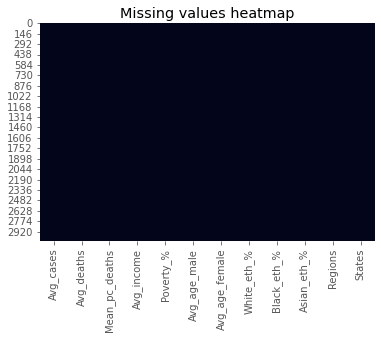

In [ ]:
#Displaying missing values heatmap
new_columns_df.isnull().sum()
sns.heatmap(new_columns_df.isnull(), cbar = False).set_title("Missing values heatmap")

In [ ]:
#Removing missing values
new_columns_df.dropna(inplace = True)

new_columns_df.head()

,Avg_cases,Avg_deaths,Mean_pc_deaths,Avg_income,Poverty_%,Avg_age_male,Avg_age_female,White_eth_%,Black_eth_%,Asian_eth_%,Regions,States
0,1397.0,469,164.9,61898,11.2,36.9,41.7,81.780529,2.594728,4.821857,Kitsap County,Washington
1,173.0,70,161.3,48127,18.6,32.2,33.7,89.228509,0.969102,2.246233,Kittitas County,Washington
2,102.0,50,174.7,49348,14.6,44.0,45.8,90.922190,0.739673,0.465898,Klickitat County,Washington
3,427.0,202,194.8,44243,17.1,42.2,43.4,91.744686,0.782626,1.161359,Lewis County,Washington
4,57.0,26,144.4,49955,12.5,47.8,48.9,94.104024,0.270192,0.665830,Lincoln County,Washington


In [ ]:
#Check summary information of the dataframe
new_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 0 to 3046
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Avg_cases       3047 non-null   float64
 1   Avg_deaths      3047 non-null   int64  
 2   Mean_pc_deaths  3047 non-null   float64
 3   Avg_income      3047 non-null   int64  
 4   Poverty_%       3047 non-null   float64
 5   Avg_age_male    3047 non-null   float64
 6   Avg_age_female  3047 non-null   float64
 7   White_eth_%     3047 non-null   float64
 8   Black_eth_%     3047 non-null   float64
 9   Asian_eth_%     3047 non-null   float64
 10  Regions         3047 non-null   object 
 11  States          3047 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 309.5+ KB


In [ ]:
#Checking number of regions
print('In this dataset the Region field include: ' + str(new_columns_df.Regions.duplicated().sum()) + ' regions of the United States.')

In this dataset the Region field include: 1228 regions of the United States.


In [ ]:
#Checking descriptive statistics of the dataframe
new_columns_df.describe()

,Avg_cases,Avg_deaths,Mean_pc_deaths,Avg_income,Poverty_%,Avg_age_male,Avg_age_female,White_eth_%,Black_eth_%,Asian_eth_%
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,47063.281917,16.878175,39.570725,42.145323,83.645286,9.107978,1.253965
std,1416.356223,504.134286,27.751511,12040.090836,6.409087,5.226017,5.292849,16.380025,14.534538,2.610276
min,6.000000,3.000000,59.700000,22640.000000,3.200000,22.400000,22.300000,10.199155,0.000000,0.000000
25%,76.000000,28.000000,161.200000,38882.500000,12.150000,36.350000,39.100000,77.296180,0.620675,0.254199
50%,171.000000,61.000000,178.100000,45207.000000,15.900000,39.600000,42.400000,90.059774,2.247576,0.549812
75%,518.000000,149.000000,195.200000,52492.000000,20.400000,42.500000,45.300000,95.451693,10.509732,1.221037
max,38150.000000,14010.000000,362.800000,125635.000000,47.400000,64.700000,65.700000,100.000000,85.947799,42.619425


Identifying outliers

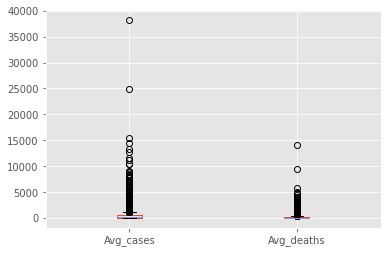

In [ ]:
#Outliers identification
numeric_col = ['Avg_cases','Avg_deaths']
new_columns_df.boxplot(numeric_col)

Removing outliers

In [ ]:
#https://www.askpython.com/python/examples/detection-removal-outliers-in-python 
for x in ['Avg_cases','Avg_deaths']:
  q75,q25 = np.percentile(new_columns_df.loc[:,x],[75,25])
  intr_qr = q75-q25


  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)
 
  new_columns_df.loc[new_columns_df[x] < min,x] = np.nan
  new_columns_df.loc[new_columns_df[x] > max,x] = np.nan

  print(new_columns_df.isnull().sum())

Avg_cases         461
Avg_deaths          0
Mean_pc_deaths      0
Avg_income          0
Poverty_%           0
Avg_age_male        0
Avg_age_female      0
White_eth_%         0
Black_eth_%         0
Asian_eth_%         0
Regions             0
States              0
dtype: int64
Avg_cases         461
Avg_deaths        349
Mean_pc_deaths      0
Avg_income          0
Poverty_%           0
Avg_age_male        0
Avg_age_female      0
White_eth_%         0
Black_eth_%         0
Asian_eth_%         0
Regions             0
States              0
dtype: int64


In [ ]:
#Dropping the outliers
new_columns_df = new_columns_df.dropna(axis = 0)
print(new_columns_df.isnull().sum())

Avg_cases         0
Avg_deaths        0
Mean_pc_deaths    0
Avg_income        0
Poverty_%         0
Avg_age_male      0
Avg_age_female    0
White_eth_%       0
Black_eth_%       0
Asian_eth_%       0
Regions           0
States            0
dtype: int64


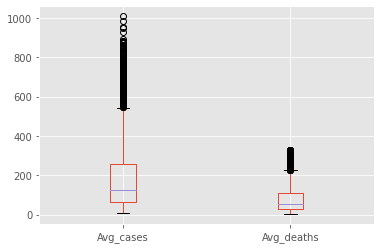

In [ ]:
#Using boxplot to confirm outliers removal
numeric_col = ['Avg_cases','Avg_deaths']
new_columns_df.boxplot(numeric_col)

#Analysing data

In [ ]:
#Checking null entries in the dataset
new_columns_df.isnull().sum()

Avg_cases         0
Avg_deaths        0
Mean_pc_deaths    0
Avg_income        0
Poverty_%         0
Avg_age_male      0
Avg_age_female    0
White_eth_%       0
Black_eth_%       0
Asian_eth_%       0
Regions           0
States            0
dtype: int64

In [ ]:
#Checking number of variables and records for the analysis
print('The final shape of the cancer occurance dataset : ' + str(new_columns_df.shape))

The final shape of the cancer occurance dataset : (2503, 12)


In [ ]:
#Checking datatypes in the new dataset
new_columns_df.dtypes

Avg_cases         float64
Avg_deaths        float64
Mean_pc_deaths    float64
Avg_income          int64
Poverty_%         float64
Avg_age_male      float64
Avg_age_female    float64
White_eth_%       float64
Black_eth_%       float64
Asian_eth_%       float64
Regions            object
States             object
dtype: object

Visualisations

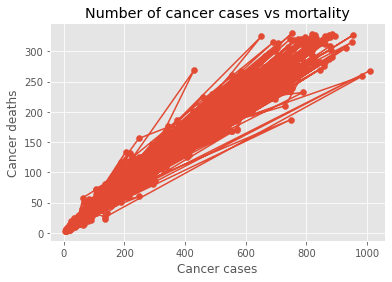

In [ ]:
#Linear regression chart
slope, intercept, r_value, p_value, std_error = stats.linregress(new_columns_df['Avg_cases'],new_columns_df['Avg_deaths'])

def regression(x):
  return slope*x + intercept

  model = list(map(regression,new_columns_df['Avg_deaths']))

plt.scatter(new_columns_df['Avg_cases'],new_columns_df['Avg_deaths'])
plt.title('Number of cancer cases vs mortality')
plt.xlabel('Cancer cases')
plt.ylabel('Cancer deaths')
plt.plot(new_columns_df['Avg_cases'],new_columns_df['Avg_deaths'])
plt.show()

In [ ]:
#Calculating the Correlation Coefficient
slope, intercept, r_value, p_value, std_error = stats.linregress(new_columns_df['Avg_cases'],new_columns_df['Avg_deaths'])

print('Slope: ' + str(slope))
print('Intercept: ' + str(intercept))
print('R value(The Correlation Coefficient is): ' + str(r_value))
print('P value: ' + str(p_value))
plt.show()

Slope: 0.37480315391327945
Intercept: 5.530852521961592
R value(The Correlation Coefficient is): 0.9857662934353132
P value: 0.0


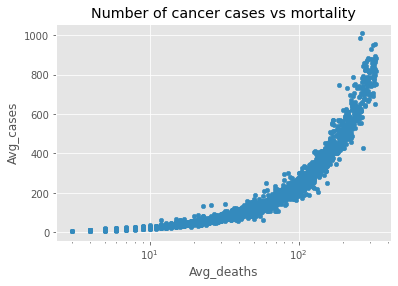

In [ ]:
#Displaying scatter plot
new_columns_df.plot(kind='scatter',x='Avg_deaths', y='Avg_cases',
        title='Number of cancer cases vs mortality',logx=True,
        fontsize=10,
        grid=True)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


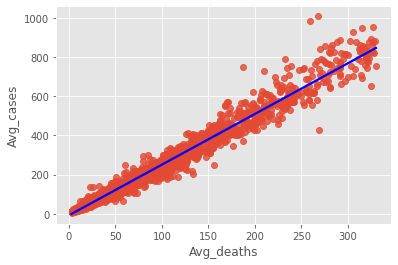

In [ ]:
#Displaying scatter plot - Linear Regression
sns.regplot('Avg_deaths', 'Avg_cases', new_columns_df,
         line_kws = {"color":"b"}, ci=None)

#Building model



Creating the Linear Regression

In [ ]:
lm = sm.OLS.from_formula('Avg_deaths ~ Avg_cases', new_columns_df)
model_result = lm.fit()


In [ ]:
#Displaying model details
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:             Avg_deaths   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 8.598e+04
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:41:11   Log-Likelihood:                -9804.0
No. Observations:                2503   AIC:                         1.961e+04
Df Residuals:                    2501   BIC:                         1.962e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5309      0.350     15.810      0.0

In [ ]:
model_result.pvalues

Intercept    9.787897e-54
Avg_cases    0.000000e+00
dtype: float64

Model Predictions

In [ ]:
#Creating new data for the model
new_data = pd.DataFrame([[100],[200],[300],[400],[500],[1000],[2000],[3000],[4000],[5000],[6000]],
                        columns = ['Avg_cases'])
print(new_data)

    Avg_cases
0         100
1         200
2         300
3         400
4         500
5        1000
6        2000
7        3000
8        4000
9        5000
10       6000


In [ ]:
#Displaying number of death cases for the cancer cases accordingly
model_result.predict(new_data)

0       43.011168
1       80.491483
2      117.971799
3      155.452114
4      192.932429
5      380.334006
6      755.137160
7     1129.940314
8     1504.743468
9     1879.546622
10    2254.349776
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


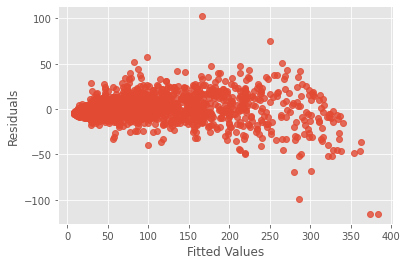

In [ ]:
#plotting residuals against the fitted values
fitted_values = pd.Series(model_result.fittedvalues, name="Fitted Values")
residuals = pd.Series(model_result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)